<h1>NAISARGI SHAH</h1>
<h1>TSF GRIP JAN 2021</h1>
<h1>Data Science and Business Analytics</h1>
<h1>Task 1: Prediction using Supervised ML</h1>

<h3>Predict the percentage of an student based on the no. of study hours.</h3>

In [18]:
#import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
#importing dataset of marks and study hours from given data
url = "http://bit.ly/w-data"
marks = pd.read_csv(url)
marks.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
marks.isnull == True

False

<h5>The given data does not consist of any null values and hence can be visualized now.</h5>

In [11]:
#analyzing the no. of rows and columns in data
marks.shape

(25, 2)

In [12]:
#calculating some statistical data
marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#getting summary of given data
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h5>Now, lets see graph representation.</h5>

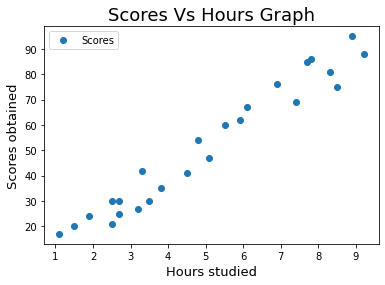

In [16]:
#plotting the hours vs. scores graph
marks.plot(x = "Hours", y = "Scores", style = "o")
plt.title('Scores Vs Hours Graph',size=18)
plt.ylabel('Scores obtained', size=13)
plt.xlabel('Hours studied', size=13)
plt.show()

<h5>Here there is a positive linear relationship between the 2 variables: Hours and Scores and straight line trend ideal for Linear Regression.</h5>

<h5>Now, lets visually represent it in form of Graph.</h5>

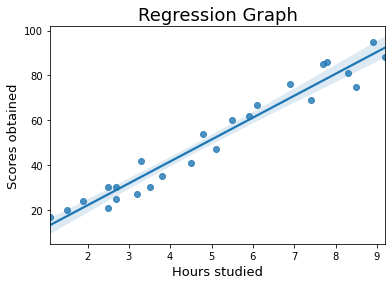

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [35]:
#plotting the linear regression graph
sns.regplot(x= marks['Hours'], y= marks['Scores'])
plt.title('Regression Graph',size=18)
plt.xlabel('Hours studied', size=13)
plt.ylabel('Scores obtained', size=13)
plt.show()
print(marks.corr())

<h5>Here the x and y variables are positively related.</h5>

<h5>Now, we train our data model. </h5>

In [22]:
#part 1:splitting the data

#import required libraries
from sklearn.model_selection import train_test_split

#defining values of X and Y from data
x = marks.iloc[:, :-1].values  
y = marks.iloc[:, 1].values

#splitting the data into train set(80%) and test set(20%)
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

In [23]:
#printing no.of rows and no.of columns in all 4 sets
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20, 1) (20,) (5, 1) (5,)


In [24]:
#part 2:fitting data in train set model

#import required libraries
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
print("............Data Trained.............")

............Data Trained.............


In [27]:
#part 3:predicting the scores

#predicting the model
y_pred = reg.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Scores': [k for k in y_pred]})

In [28]:
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [29]:
#part 4:comparing the actual score with predicted score

comp = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred})  

In [30]:
comp

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<h5>Now, lets visually represent it in form of Graph.</h5>

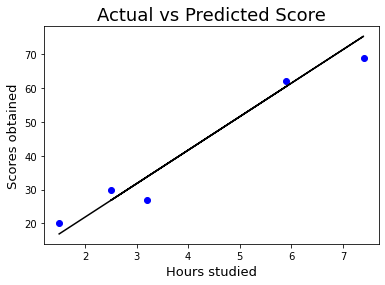

In [34]:
#Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, y_pred, color='black')
plt.title('Actual vs Predicted Score', size=18)
plt.ylabel('Scores obtained', size=13)
plt.xlabel('Hours studied', size=13)
plt.show()

<h5>Now lets check efficiency of our model using Mean Absolute Error.</h5>

In [36]:
#checking accuracy of model

#import required libraries
from sklearn.metrics import mean_absolute_error

print('Mean absolute error is: ', mean_absolute_error(y_test, y_pred))

Mean absolute error is:  4.183859899002975


In [37]:
hours = [9.25]
score = reg.predict([hours])

In [39]:
print("If a student studies for 9.25 hrs/day, he/she is expected to score {}".format(score))

If a student studies for 9.25 hrs/day, he/she is expected to score [93.69173249]


<h2>So, we conclude that a student can be expected to score around about 93.69 marks if he/she studies for 9.25 hrs/day.</h2>